**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: DANIELA ARACELY ROSALES ESCAMILLA

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [10]:
#Guardar el dataset
happiness = pd.read_csv('happiness_report.csv')

In [11]:
#Revisar el dataframe
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice.

In [13]:
#Obtener la información de México
mexico = happiness[happiness['Country or region']=='Mexico'].set_index('Country or region')
mexico.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

Text(0, 0.5, 'Frequency')

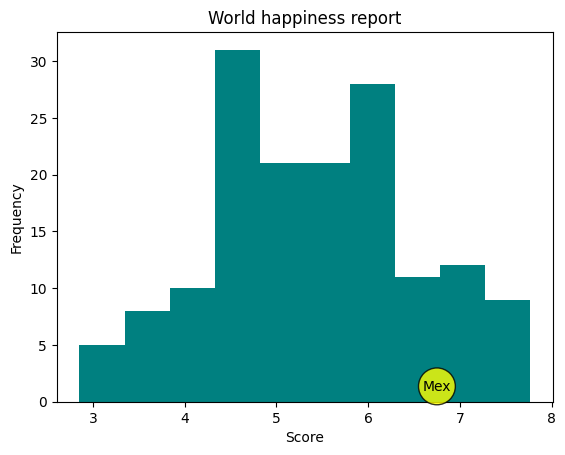

In [101]:
#Hacer un histograma del score
plt.hist(happiness['Score'], bins=10, color = 'teal')
value=mexico.loc['Mexico','Score']
props_box = {'boxstyle':'circle',
             'facecolor': 'yellow',
             'alpha': 0.8}
plt.text(value,1,'Mex', bbox = props_box)
plt.title ('World happiness report')
plt.xlabel("Score")
plt.ylabel("Frequency")

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

Text(0.3, 1, 'Mex')

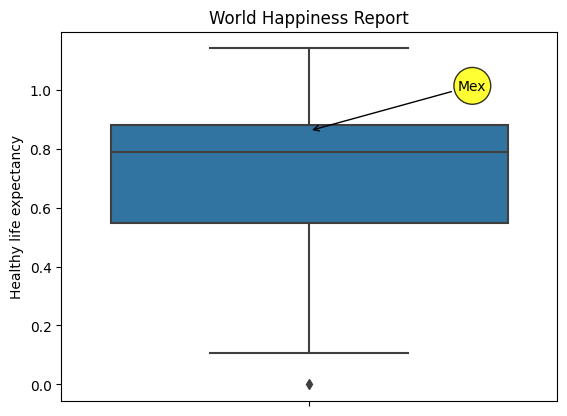

In [15]:
#Construyendo el boxplot
sns.boxplot(y=happiness['Healthy life expectancy']).set(title = 'World Happiness Report')
value_2=mexico.loc['Mexico','Healthy life expectancy']
plt.annotate('Mex', xy=(0,value_2) , xytext= (0.3,1), bbox = props_box,arrowprops=dict(arrowstyle = '->'))

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

In [16]:
mexico_percent=mexico.loc[:,'GDP per capita':'Perceptions of corruption'].transpose().rename(columns={'Country or region': None ,'Mexico':'Factor'})


Text(0.5, 1.0, 'Contribution in Mexico Happiness score')

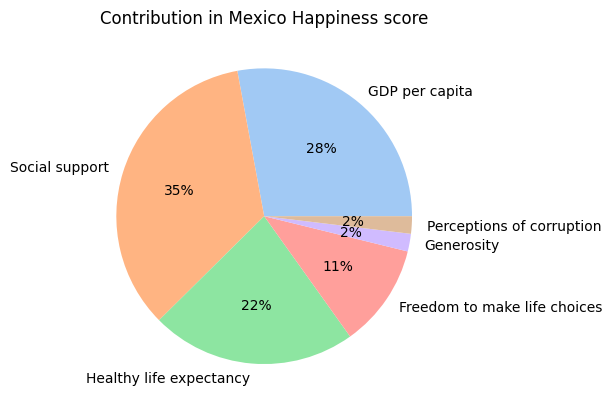

In [17]:
palette_color = sns.color_palette('pastel')
plt.pie(x= mexico_percent['Factor'],
        labels= mexico_percent.index,
        colors=palette_color,
        autopct='%.0f%%')



7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

In [18]:
#Definir la lista de países
countries = ['Finland','Mexico','South Sudan','United States', 'Canada']
happiness_countries = happiness[happiness['Country or region'].isin(countries)].reset_index()
happiness_countries

,index,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
2,18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128
3,22,23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073
4,155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [26]:
df1= pd.melt(happiness_countries, id_vars=['Country or region'], value_vars = ['GDP per capita','Social support',
                                                                               'Healthy life expectancy','Generosity',
                                                                               'Freedom to make life choices',
                                                                               'Perceptions of corruption'])
df1

,Country or region,variable,value
0,Finland,GDP per capita,1.340
1,Canada,GDP per capita,1.365
2,United States,GDP per capita,1.433
3,Mexico,GDP per capita,1.070
4,South Sudan,GDP per capita,0.306
5,Finland,Social support,1.587
6,Canada,Social support,1.505
7,United States,Social support,1.457
8,Mexico,Social support,1.323
9,South Sudan,Social support,0.575


Text(0.5, 1.0, 'World happiness report')

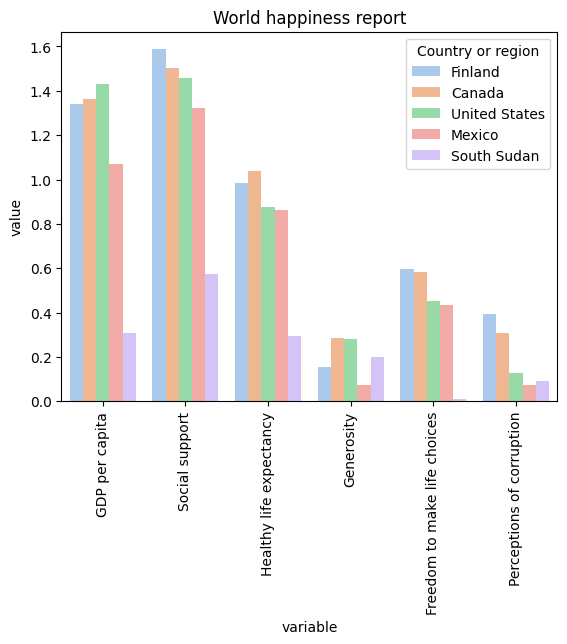

In [43]:
sns.set_palette("pastel")
g=sns.barplot(data = df1, x = 'variable', y = 'value', hue = 'Country or region')
g.set_xticklabels( labels = ['GDP per capita','Social support','Healthy life expectancy','Generosity', 'Freedom to make life choices','Perceptions of corruption'], rotation=90)
plt.title ('World happiness report')

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

<Axes: xlabel='Score', ylabel='Perceptions of corruption'>

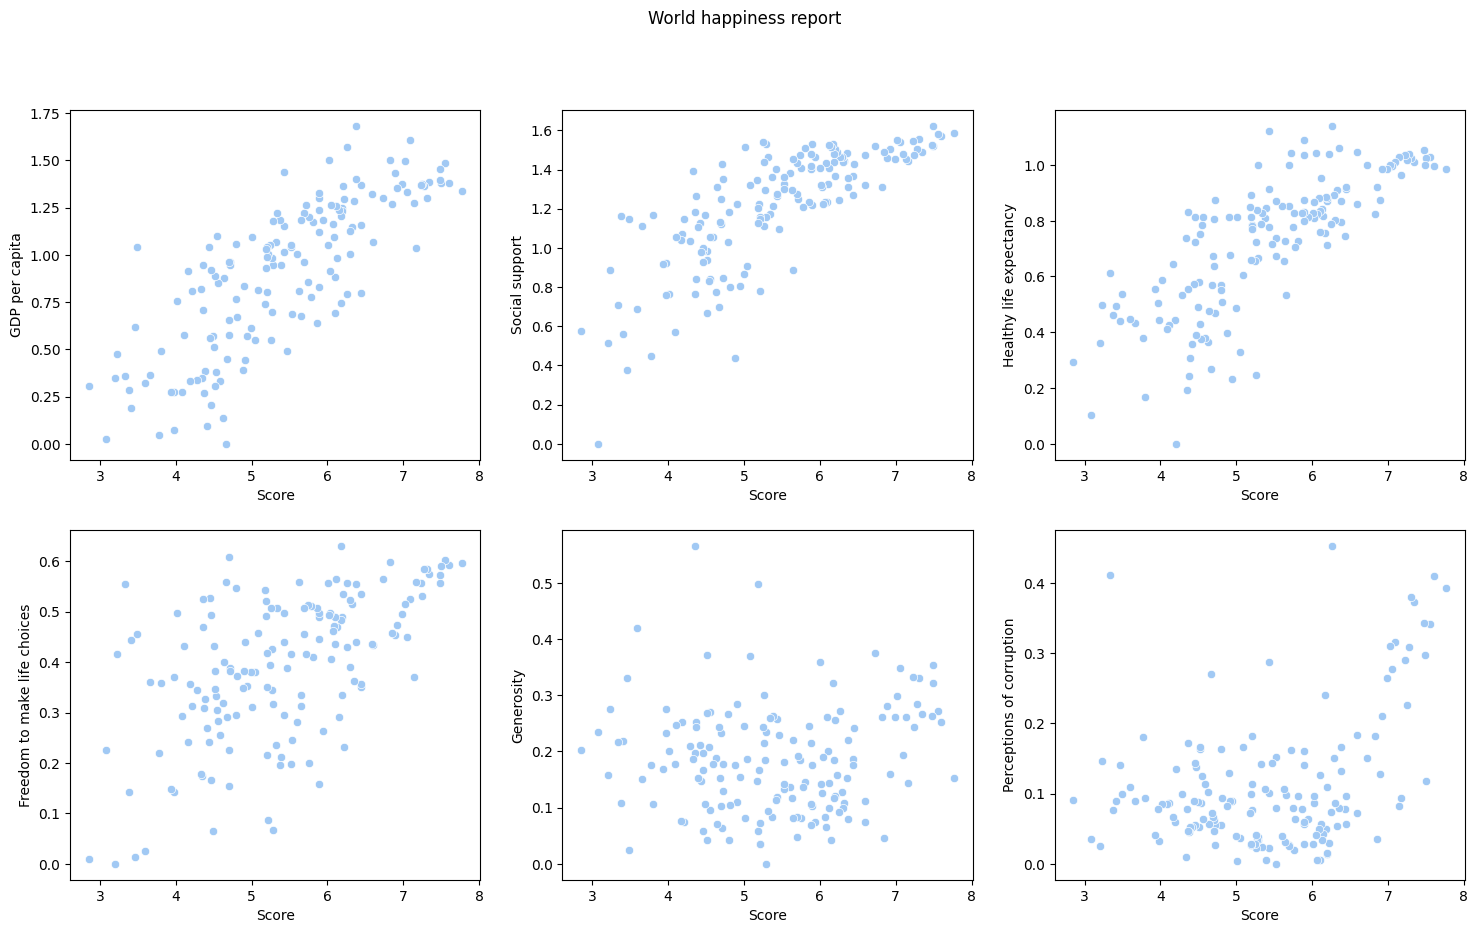

In [98]:
fig,axes = plt.subplots(2,3, figsize = (18,10))
#plt.subplots_adjust(wspace=0.4, hspace=0.6)
fig.suptitle('World happiness report')

#Insertar las gráficas
sns.scatterplot(ax = axes[0,0],data = happiness, x= 'Score', y= 'GDP per capita')
sns.scatterplot(ax = axes[0,1],data = happiness, x= 'Score', y= 'Social support')
sns.scatterplot(ax = axes[0,2],data = happiness, x= 'Score', y= 'Healthy life expectancy')
sns.scatterplot(ax = axes[1,0],data = happiness, x= 'Score', y= 'Freedom to make life choices')
sns.scatterplot(ax = axes[1,1],data = happiness, x= 'Score', y= 'Generosity')
sns.scatterplot(ax = axes[1,2],data = happiness, x= 'Score', y= 'Perceptions of corruption')


9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

<ipython-input-71-0f474a41f1cd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = happiness.corr()


<Axes: >

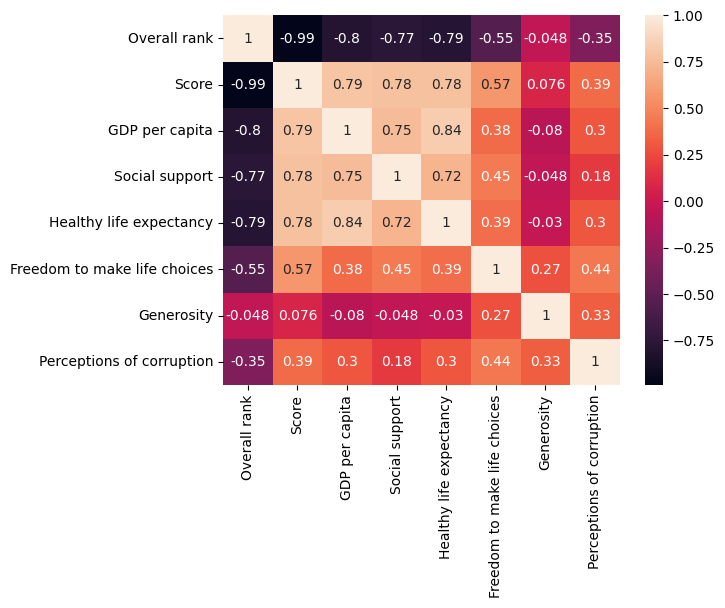

In [71]:
#Set correlation matrix
df2 = happiness[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices', 'Generosity','Perceptions of corruption']]
corr_matrix = happiness.corr()
sns.heatmap(corr_matrix, annot= True)

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región.

In [73]:
#Read the file
metadata= pd.read_csv('Metadata.csv')
metadata

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra
...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia


In [79]:
#Prepare the joint file
df1= metadata[['TableName','Region']]

df_out = happiness.merge(df1, left_on= 'Country or region', right_on= 'TableName', how = 'left')
df_out.drop(columns = ['TableName'], inplace= True)
df_out

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe & Central Asia
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe & Central Asia
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe & Central Asia
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe & Central Asia
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Sub-Saharan Africa
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Sub-Saharan Africa
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,South Asia
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,Sub-Saharan Africa


In [91]:
#groupby to obtain average by region

df_avg = df_out.groupby(by = ['Region']).mean().reset_index()

df_avg

ticklabels = df_avg['Region'].to_list()

<ipython-input-91-51afa8cc7215>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg = df_out.groupby(by = ['Region']).mean().reset_index()


Text(0.5, 1.0, 'World happiness report')

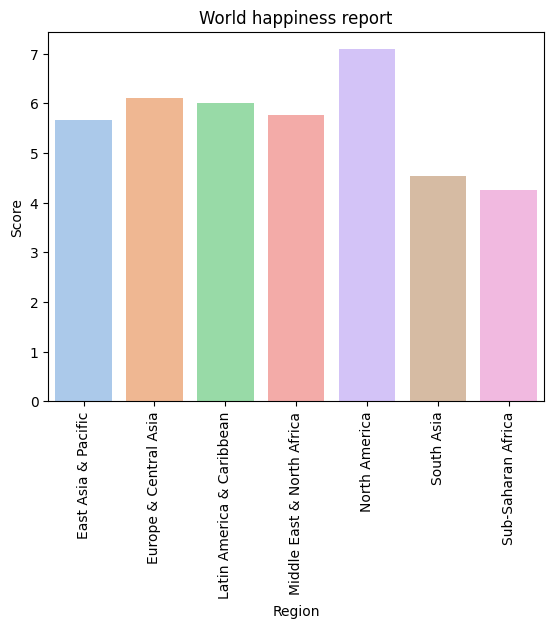

In [99]:
#Plot the graph

g = sns.barplot(data=df_avg, x='Region',y='Score')
g.set_xticklabels( labels = ticklabels, rotation=90)
plt.title ('World happiness report')